In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
import os

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [4]:
os.chdir('F:\\College Trainings\\Batch 3\\Random Forest')

In [17]:
churn_data = pd.read_csv( "Churn Data.csv")

In [18]:
churn_data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [19]:
churn_data.shape

(3333, 21)

In [20]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [21]:
churn_data.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

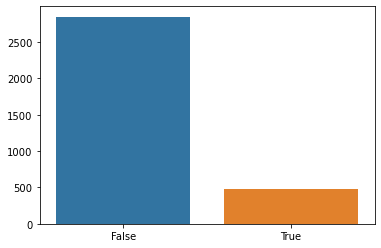

In [22]:
y = churn_data.churn.value_counts()
sns.barplot(y.index, y.values)

<AxesSubplot:xlabel='state'>

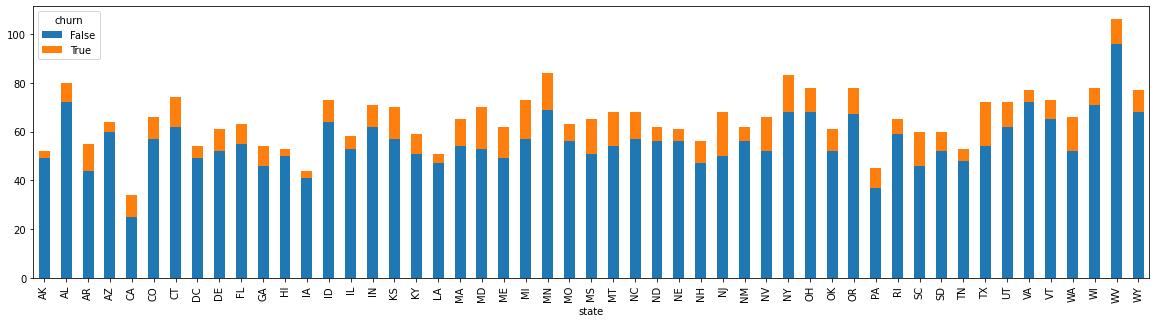

In [23]:
churn_data.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5))

In [24]:
churn_data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [25]:
type(churn_data)

pandas.core.frame.DataFrame

In [26]:
churn_data.drop(['phone number'], axis=1,inplace=True) 

In [28]:
churn_data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [29]:
# , inplace=True : To delete the column without having to reassign, so new table cannot be created 
# , inplace=False : To delete the column by reassign to new table, so new table can be created 
X = churn_data.drop(['churn'], axis=1, inplace=False)  

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
X.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [32]:
X.shape

(3333, 19)

In [33]:
#Y = pd.DataFrame(churn_data['churn']) # method 1

In [34]:
#Y.churn.value_counts()

In [35]:
#X = data_final.loc[:, data_final.columns != 'y']
#Y= churn_data.loc[:, churn_data.columns == 'churn'] # method 2

In [36]:
#Y.churn.value_counts()

In [37]:
#type(Y)

In [38]:
Y = churn_data.churn   # Method 3

In [39]:
Y.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [40]:
type(Y)

pandas.core.series.Series

In [41]:
Y = Y.astype(int)

In [42]:
#Y.head()

In [43]:
#Y.churn.value_counts()
Y.value_counts() # method 3

0    2850
1     483
Name: churn, dtype: int64

In [46]:
X.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [48]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train, y_train);

ValueError: could not convert string to float: 'GA'

In [49]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [50]:
# State is string and we want discreet integer values
X['state'] = label_encoder.fit_transform(X['state'])
X['international plan'] = label_encoder.fit_transform(X['international plan'])
X['voice mail plan'] = label_encoder.fit_transform(X['voice mail plan'])

In [52]:
X.state.unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28])

In [53]:
X.state.nunique()

51

In [54]:
X

state  account length  area code  international plan  voice mail plan  \
0        16             128        415                   0                1   
1        35             107        415                   0                1   
2        31             137        415                   0                0   
3        35              84        408                   1                0   
4        36              75        415                   1                0   
...     ...             ...        ...                 ...              ...   
3328      3             192        415                   0                1   
3329     49              68        415                   0                0   
3330     39              28        510                   0                0   
3331      6             184        510                   1                0   
3332     42              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328               

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int32  
 4   voice mail plan         3333 non-null   int32  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [60]:
X_test.shape

(1000, 19)

In [62]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42,max_features=4)
# Train the model on training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=1000, random_state=42)

In [63]:
len(clf.estimators_) # number of trees

1000

In [64]:
# https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn
from sklearn.tree import export_graphviz
estimator = clf.estimators_[999] # number of trees to visualise
# Export as dot file
export_graphviz(estimator, out_file='RandomForest.dot', 
                feature_names = X_train.columns,
                #class_names = y_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# file will be saved in current working directory

In [65]:
from subprocess import call
!dot -Tpng RandomForest.dot -o tree_limited.png -Gdpi=200
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [66]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [67]:
feature_importances

importance
total day minutes         0.138430
total day charge          0.133509
customer service calls    0.123420
international plan        0.073958
total eve minutes         0.063622
total eve charge          0.063069
total intl calls          0.045492
total intl minutes        0.043910
total intl charge         0.042315
total night minutes       0.036424
total night charge        0.035772
total day calls           0.031508
account length            0.029911
total eve calls           0.028632
number vmail messages     0.028088
total night calls         0.027981
state                     0.025895
voice mail plan           0.019371
area code                 0.008691

In [68]:
importances = clf.feature_importances_  # Gini importance.

[0.02589509 0.02991127 0.00869081 0.0739582  0.01937138 0.02808818
 0.1384304  0.03150828 0.13350922 0.06362229 0.02863232 0.06306914
 0.03642441 0.02798095 0.03577152 0.04390951 0.04549171 0.04231482
 0.12342048]


<AxesSubplot:>

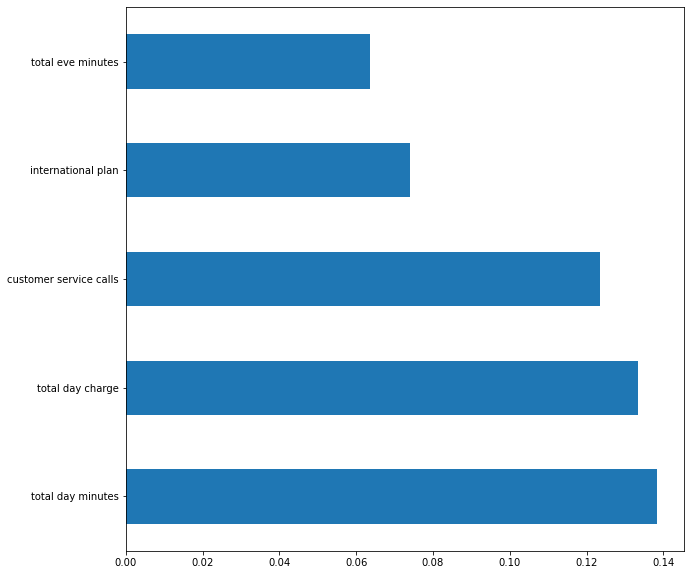

In [69]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [91]:
#X_train.columns     # to see columns

In [92]:
#importances

In [70]:
indices = np.argsort(importances)[::-1]

In [71]:
indices   # 9 is the 10th column , indexing starts from 0

array([ 6,  8, 18,  3,  9, 11, 16, 15, 17, 12, 14,  7,  1, 10,  5, 13,  0,
        4,  2], dtype=int64)

In [72]:
for f in range(X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print ("feature name: ", X.columns[indices[f]])

1. feature 6 (0.138430)
feature name:  total day minutes
2. feature 8 (0.133509)
feature name:  total day charge
3. feature 18 (0.123420)
feature name:  customer service calls
4. feature 3 (0.073958)
feature name:  international plan
5. feature 9 (0.063622)
feature name:  total eve minutes
6. feature 11 (0.063069)
feature name:  total eve charge
7. feature 16 (0.045492)
feature name:  total intl calls
8. feature 15 (0.043910)
feature name:  total intl minutes
9. feature 17 (0.042315)
feature name:  total intl charge
10. feature 12 (0.036424)
feature name:  total night minutes
11. feature 14 (0.035772)
feature name:  total night charge
12. feature 7 (0.031508)
feature name:  total day calls
13. feature 1 (0.029911)
feature name:  account length
14. feature 10 (0.028632)
feature name:  total eve calls
15. feature 5 (0.028088)
feature name:  number vmail messages
16. feature 13 (0.027981)
feature name:  total night calls
17. feature 0 (0.025895)
feature name:  state
18. feature 4 (0.01937

In [73]:
# use the model to make predictions with the test data
y_pred = clf.predict(X_test)

In [74]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [75]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions = pd.DataFrame({'Actual':y_test, 'predictions':y_pred})

In [76]:
final_model_predictions.head()

Actual  predictions
1997       0            0
1736       1            1
962        0            0
263        0            0
1436       0            0

In [77]:
#del final_model_predictions

In [78]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 39
Accuracy: 0.96


In [79]:
# Gini Index
#Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.
#It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. 
#Higher the value of Gini, higher the homogeneity. 

In [80]:
# Information Gain : entropy before split - entropy after split
#Entropy is a way of measuring the amount of impurity in a given set of data. e = -pi(log2pi)

In [81]:
y_pred_prob = clf.predict_proba(X_test)  # 2  columns for probability it is creating

In [82]:
y_pred_prob

array([[0.887, 0.113],
       [0.254, 0.746],
       [0.985, 0.015],
       ...,
       [0.977, 0.023],
       [0.992, 0.008],
       [0.976, 0.024]])

In [83]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]   # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1

In [84]:
#y_pred_prob

In [85]:
#y_pred_prob.shape  # 2  columns for probability it is creating

In [86]:
#y_pred_prob.columns

In [87]:
final_model_predictions['Predicted_prob'] = y_pred_prob

In [88]:
final_model_predictions.head()

Actual  predictions  Predicted_prob
1997       0            0           0.113
1736       1            1           0.746
962        0            0           0.015
263        0            0           0.058
1436       0            0           0.114

In [89]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: Qt5Agg


In [90]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

In [91]:
draw_cm( final_model_predictions.Actual, final_model_predictions.predictions )   # correct 0 is sensitivity and correct is specificity

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [92]:
y_test.value_counts()

0    878
1    122
Name: churn, dtype: int64

In [93]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score(final_model_predictions.Actual, final_model_predictions.predictions  ), 2 ) )

cm1 = metrics.confusion_matrix( final_model_predictions.Actual, final_model_predictions.predictions , [1,0] )

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.96
Precision :  0.91
Recall :  0.75
Sensitivity :  0.75
Specificity :  0.99


In [94]:
# Recall : How many 1's you have correctly recalled/ predicted as 1's from actual 1's = (tp/tp+fn)= (95/(95+27))
# Precision: How many 1's you have predicted correctly out of total 1's you have got from model=(tp/tp+fp)=(95/(95+9))

In [95]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: Qt5Agg


In [96]:
sn.distplot( final_model_predictions[final_model_predictions.Actual == 1]["Predicted_prob"], kde=False, color = 'b' )
sn.distplot( final_model_predictions[final_model_predictions.Actual == 0]["Predicted_prob"], kde=False, color = 'g' )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted_prob'>

In [97]:
auc_score = metrics.roc_auc_score( final_model_predictions.Actual, final_model_predictions.Predicted_prob  )
round( float( auc_score ), 2 )

0.92

In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [101]:
fpr, tpr, thresholds = draw_roc( final_model_predictions.Actual, final_model_predictions.Predicted_prob )

In [102]:
# Saving  the Trained Model, serialization
import pickle
filename = "Random_Forest.sav"
pickle.dump(clf, open(filename, 'wb'))

In [103]:
# Load the model , Deserialization
Random_Forest_Model = pickle.load(open("Random_Forest.sav", 'rb'))

In [104]:
check = Random_Forest_Model.predict(X_test)

#  KS, Gain and Lift Chart

# https://www.datavedas.com/model-evaluation-in-python/

In [89]:
final_model_predictions.head()

Actual  predictions  Predicted_prob
1997       0            0           0.129
1736       1            1           0.758
962        0            0           0.012
263        0            0           0.065
1436       0            0           0.135

In [105]:
final_model_predictions1 = final_model_predictions.drop(['predictions'], axis=1, inplace= False) 

In [106]:
final_model_predictions1.head()

Actual  Predicted_prob
1997       0           0.113
1736       1           0.746
962        0           0.015
263        0           0.058
1436       0           0.114

In [108]:
final_model_predictions1['decile'] = pd.qcut(final_model_predictions1['Predicted_prob'],10,labels=['1','2','3','4','5','6','7','8','9','10'])
final_model_predictions1.head()

Actual  Predicted_prob decile
1997       0           0.113      8
1736       1           0.746     10
962        0           0.015      1
263        0           0.058      6
1436       0           0.114      8

In [109]:
final_model_predictions1['decile'].value_counts()

1     112
7     102
5     102
4     101
10    100
9     100
8      98
3      98
6      97
2      90
Name: decile, dtype: int64

In [110]:
final_model_predictions1.columns = ['Defaulter','Probability','Decile']
final_model_predictions1.head()

Defaulter  Probability Decile
1997          0        0.113      8
1736          1        0.746     10
962           0        0.015      1
263           0        0.058      6
1436          0        0.114      8

In [112]:
final_model_predictions1['Non-Defaulter'] = 1-final_model_predictions1['Defaulter']
final_model_predictions1.head()

Defaulter  Probability Decile  Non-Defaulter
1997          0        0.113      8              1
1736          1        0.746     10              0
962           0        0.015      1              1
263           0        0.058      6              1
1436          0        0.114      8              1

In [113]:
final_model_predictions1.shape

(1000, 4)

In [114]:
df1 = pd.pivot_table(data=final_model_predictions1,index=['Decile'],values=['Defaulter','Non-Defaulter','Probability'],
                     aggfunc={'Defaulter':[np.sum],
                              'Non-Defaulter':[np.sum],
                              'Probability' : [np.min,np.max]})
df1

Defaulter Non-Defaulter Probability       
             sum           sum        amax   amin
Decile                                           
1              2           110       0.016  0.002
2              1            89       0.023  0.017
3              1            97       0.031  0.024
4              6            95       0.039  0.032
5              1           101       0.053  0.040
6              2            95       0.073  0.054
7              2           100       0.108  0.074
8              1            97       0.159  0.109
9             14            86       0.501  0.161
10            92             8       0.965  0.504

In [115]:
df1.reset_index()

Decile Defaulter Non-Defaulter Probability       
               sum           sum        amax   amin
0      1         2           110       0.016  0.002
1      2         1            89       0.023  0.017
2      3         1            97       0.031  0.024
3      4         6            95       0.039  0.032
4      5         1           101       0.053  0.040
5      6         2            95       0.073  0.054
6      7         2           100       0.108  0.074
7      8         1            97       0.159  0.109
8      9        14            86       0.501  0.161
9     10        92             8       0.965  0.504

In [116]:
df1.columns = ['Defaulter_Count','Non-Defaulter_Count','max_score','min_score']
df1['Total_Cust'] = df1['Defaulter_Count']+df1['Non-Defaulter_Count']
df1


Defaulter_Count  Non-Defaulter_Count  max_score  min_score  Total_Cust
Decile                                                                        
1                     2                  110      0.016      0.002         112
2                     1                   89      0.023      0.017          90
3                     1                   97      0.031      0.024          98
4                     6                   95      0.039      0.032         101
5                     1                  101      0.053      0.040         102
6                     2                   95      0.073      0.054          97
7                     2                  100      0.108      0.074         102
8                     1                   97      0.159      0.109          98
9                    14                   86      0.501      0.161         100
10                   92                    8      0.965      0.504         100

In [118]:
df2 = df1.sort_values(by='min_score',ascending=False)
df2

Defaulter_Count  Non-Defaulter_Count  max_score  min_score  Total_Cust
Decile                                                                        
10                   92                    8      0.965      0.504         100
9                    14                   86      0.501      0.161         100
8                     1                   97      0.159      0.109          98
7                     2                  100      0.108      0.074         102
6                     2                   95      0.073      0.054          97
5                     1                  101      0.053      0.040         102
4                     6                   95      0.039      0.032         101
3                     1                   97      0.031      0.024          98
2                     1                   89      0.023      0.017          90
1                     2                  110      0.016      0.002         112

In [119]:
df2['Default_Rate'] = (df2['Defaulter_Count'] / df2['Total_Cust']).apply('{0:.2%}'.format)
default_sum = df2['Defaulter_Count'].sum()
non_default_sum = df2['Non-Defaulter_Count'].sum()
df2['Default %'] = (df2['Defaulter_Count']/default_sum).apply('{0:.2%}'.format)
df2['Non_Default %'] = (df2['Non-Defaulter_Count']/non_default_sum).apply('{0:.2%}'.format)
df2

Defaulter_Count  Non-Defaulter_Count  max_score  min_score  \
Decile                                                               
10                   92                    8      0.965      0.504   
9                    14                   86      0.501      0.161   
8                     1                   97      0.159      0.109   
7                     2                  100      0.108      0.074   
6                     2                   95      0.073      0.054   
5                     1                  101      0.053      0.040   
4                     6                   95      0.039      0.032   
3                     1                   97      0.031      0.024   
2                     1                   89      0.023      0.017   
1                     2                  110      0.016      0.002   

        Total_Cust Default_Rate Default % Non_Default %  
Decile                                                   
10             100       92.00%    75.41%         0.91%  
9              100       14.00%    11.48%         9.79%  
8               98        1.02%     0.82%        11.05%  
7              102        1.96%     1.64%        11.39%  
6               97        2.06%     1.64%        10.82%  
5              102        0.98%     0.82%        11.50%  
4              101        5.94%     4.92%        10.82%  
3               98        1.02%     0.82%        11.05%  
2               90        1.11%     0.82%        10.14%  
1              112        1.79%     1.64%        12.53%

In [120]:
df2['ks_stats'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum() -(df2['Non-Defaulter_Count'] / df2['Non-Defaulter_Count'].sum()).cumsum()), 4) * 100
df2

Defaulter_Count  Non-Defaulter_Count  max_score  min_score  \
Decile                                                               
10                   92                    8      0.965      0.504   
9                    14                   86      0.501      0.161   
8                     1                   97      0.159      0.109   
7                     2                  100      0.108      0.074   
6                     2                   95      0.073      0.054   
5                     1                  101      0.053      0.040   
4                     6                   95      0.039      0.032   
3                     1                   97      0.031      0.024   
2                     1                   89      0.023      0.017   
1                     2                  110      0.016      0.002   

        Total_Cust Default_Rate Default % Non_Default %  ks_stats  
Decile                                                             
10             100       92.00%    75.41%         0.91%     74.50  
9              100       14.00%    11.48%         9.79%     76.18  
8               98        1.02%     0.82%        11.05%     65.95  
7              102        1.96%     1.64%        11.39%     56.20  
6               97        2.06%     1.64%        10.82%     47.02  
5              102        0.98%     0.82%        11.50%     36.34  
4              101        5.94%     4.92%        10.82%     30.43  
3               98        1.02%     0.82%        11.05%     20.21  
2               90        1.11%     0.82%        10.14%     10.89  
1              112        1.79%     1.64%        12.53%      0.00

In [122]:
flag = lambda x: '*****' if x == df2['ks_stats'].max() else ''
df2['max_ks'] = df2['ks_stats'].apply(flag)
df2

Defaulter_Count  Non-Defaulter_Count  max_score  min_score  \
Decile                                                               
10                   92                    8      0.965      0.504   
9                    14                   86      0.501      0.161   
8                     1                   97      0.159      0.109   
7                     2                  100      0.108      0.074   
6                     2                   95      0.073      0.054   
5                     1                  101      0.053      0.040   
4                     6                   95      0.039      0.032   
3                     1                   97      0.031      0.024   
2                     1                   89      0.023      0.017   
1                     2                  110      0.016      0.002   

        Total_Cust Default_Rate Default % Non_Default %  ks_stats max_ks  
Decile                                                                    
10             100       92.00%    75.41%         0.91%     74.50         
9              100       14.00%    11.48%         9.79%     76.18  *****  
8               98        1.02%     0.82%        11.05%     65.95         
7              102        1.96%     1.64%        11.39%     56.20         
6               97        2.06%     1.64%        10.82%     47.02         
5              102        0.98%     0.82%        11.50%     36.34         
4              101        5.94%     4.92%        10.82%     30.43         
3               98        1.02%     0.82%        11.05%     20.21         
2               90        1.11%     0.82%        10.14%     10.89         
1              112        1.79%     1.64%        12.53%      0.00

In [123]:
df2['default_cum%'] = np.round(((df2['Defaulter_Count'] / df2['Defaulter_Count'].sum()).cumsum()), 4) * 100
df2

Defaulter_Count  Non-Defaulter_Count  max_score  min_score  \
Decile                                                               
10                   92                    8      0.965      0.504   
9                    14                   86      0.501      0.161   
8                     1                   97      0.159      0.109   
7                     2                  100      0.108      0.074   
6                     2                   95      0.073      0.054   
5                     1                  101      0.053      0.040   
4                     6                   95      0.039      0.032   
3                     1                   97      0.031      0.024   
2                     1                   89      0.023      0.017   
1                     2                  110      0.016      0.002   

        Total_Cust Default_Rate Default % Non_Default %  ks_stats max_ks  \
Decile                                                                     
10             100       92.00%    75.41%         0.91%     74.50          
9              100       14.00%    11.48%         9.79%     76.18  *****   
8               98        1.02%     0.82%        11.05%     65.95          
7              102        1.96%     1.64%        11.39%     56.20          
6               97        2.06%     1.64%        10.82%     47.02          
5              102        0.98%     0.82%        11.50%     36.34          
4              101        5.94%     4.92%        10.82%     30.43          
3               98        1.02%     0.82%        11.05%     20.21          
2               90        1.11%     0.82%        10.14%     10.89          
1              112        1.79%     1.64%        12.53%      0.00          

        default_cum%  
Decile                
10             75.41  
9              86.89  
8              87.70  
7              89.34  
6              90.98  
5              91.80  
4              96.72  
3              97.54  
2              98.36  
1             100.00

In [124]:
df_test2 = df2[['default_cum%']]
df_test2.reset_index()
df_test2.columns = ['default_cum%_test']
df_test2['Base %'] = [10,20,30,40,50,60,70,80,90,100]
df_test2

<ipython-input-124-f86105efe2a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['Base %'] = [10,20,30,40,50,60,70,80,90,100]


default_cum%_test  Base %
Decile                           
10                  75.41      10
9                   86.89      20
8                   87.70      30
7                   89.34      40
6                   90.98      50
5                   91.80      60
4                   96.72      70
3                   97.54      80
2                   98.36      90
1                  100.00     100

In [126]:
final = df_test2.copy()
final.head()

default_cum%_test  Base %
Decile                           
10                  75.41      10
9                   86.89      20
8                   87.70      30
7                   89.34      40
6                   90.98      50

In [127]:
(final['default_cum%_test']/final['Base %'])

Decile
10    7.541000
9     4.344500
8     2.923333
7     2.233500
6     1.819600
5     1.530000
4     1.381714
3     1.219250
2     1.092889
1     1.000000
dtype: float64

In [128]:
final2 = pd.DataFrame()

In [129]:
final2['lift_test'] = (final['default_cum%_test']/final['Base %'])
#final2['lift_test'] = (final['default_cum%_test']/final['Base %'])
final2['Baseline']  = [1,1,1,1,1,1,1,1,1,1]
final2

lift_test  Baseline
Decile                     
10       7.541000         1
9        4.344500         1
8        2.923333         1
7        2.233500         1
6        1.819600         1
5        1.530000         1
4        1.381714         1
3        1.219250         1
2        1.092889         1
1        1.000000         1

In [130]:
lift_chart = final2[['lift_test','Baseline']]
lift_chart

lift_test  Baseline
Decile                     
10       7.541000         1
9        4.344500         1
8        2.923333         1
7        2.233500         1
6        1.819600         1
5        1.530000         1
4        1.381714         1
3        1.219250         1
2        1.092889         1
1        1.000000         1

In [131]:
lift_chart1 = lift_chart.plot(kind='line',use_index=False)
lift_chart1.set_ylabel("lift",fontsize=12)
lift_chart1.set_xlabel("Decile",fontsize=12)
lift_chart1.set_title("Lift Chart")
lift_chart1.set_ylim(0.0,8)

(0.0, 8.0)

In [132]:
# https://stackoverflow.com/questions/42699243/how-to-build-a-lift-chart-a-k-a-gains-chart-in-python

In [193]:
#!pip install scikitplot